## PDC Project
This project aims to create a transmitter and reciever that is able to reconstruct a message that was exposed by a channel effect.

In [1]:
import client
import channel_helper
import transmitter
import reciever

import matplotlib.pyplot as plt
import numpy as np

### Transmitter
The Transmitter first creates a codeword based on the 8 Bit Ascii table. For bit syncronization a predefined pattern consisting of 16 Bit with value of 1 is used. After that the codeword is transformed into a waveform. The basis function of the waveform former is a root raised cosine function. Furthermore the value 0 in the bit sequence is replaced by -1 for a better error probability. Finally the signal is shifted in the frequency domain in order to fit the requirements of the Channel-Effect.

In [2]:
%%time 
transmitter.run()

Creating waveform...

Time for function waveform_former:
47.610717

Time for function passband:
1.9098649999999964

CPU times: user 46.1 s, sys: 4.17 s, total: 50.2 s
Wall time: 50.4 s


### Channel Effect

In [3]:
!python client.py --input_file=passband.txt --output_file=output.txt --srv_hostname=iscsrv72.epfl.ch --srv_port=80

### Reciever
The Reciever takes the noisy version of the signal and first shift it back to the original frequency. After that a lowpass filter is applied with is then used to filter the noise. Because the channel applies a delay on the sequence the starting position is determined by using a convolution for the bit sequence consisting of 8 pulses with itensity 1. After that the inner product is computed to reconstruct the message using a matched filter. 

In [4]:
%%time
reciever.run()

Reconstructing Signal...

In 2000 Hz Frequency

Time for frequency Selection:
8.198597000000007

Time for finding startpoint and endpoint in time domain:
30.868692000000003

Time for function inner_product:
0.2901059999999944

Number of Correct Bits: 1280/1280

Decoded recieved signal: 
abc def ghi jkl mno pqrs tuv wxyz ABC DEF GHI JKL MNO PQRS TUV WXYZ !"§ $%& /() =?* '<> #|; ²³~ @`´ ©«» ¤¼× {} abc def ghi jkl mno pqrs tuv wxyz ABC DEF GHI JKL

Original text: 
abc def ghi jkl mno pqrs tuv wxyz ABC DEF GHI JKL MNO PQRS TUV WXYZ !"§ $%& /() =?* '<> #|; ²³~ @`´ ©«» ¤¼× {} abc def ghi jkl mno pqrs tuv wxyz ABC DEF GHI JKL

Done...
CPU times: user 39.9 s, sys: 483 ms, total: 40.3 s
Wall time: 24.3 s


### Plots
In the following part the plots of the convolution with the frequency shifted sinc are shown. Here one can see if one of the frequences being earased!

In [5]:
def compute_array(datapath):
    f = open(datapath, 'r')
    array = f.read().split('\n')
    length = len(array)
    plot_array = array[:(length-1)]
    
    
    plot_array = list(map(float, plot_array))
    return plot_array


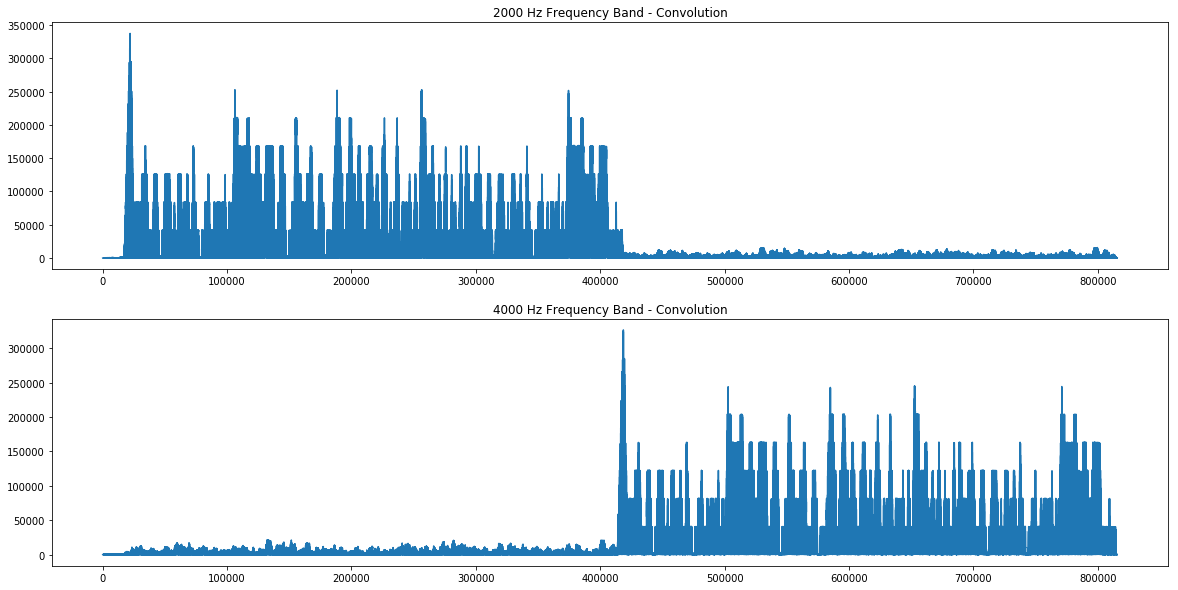

In [6]:
fig, ax = plt.subplots(2, figsize=(20,10))

passband = compute_array("test1.txt")
output = compute_array("test2.txt")



ax[0].plot(passband)
ax[0].set_title('2000 Hz Frequency Band - Convolution')
ax[1].plot(output)
ax[1].set_title('4000 Hz Frequency Band - Convolution')



plt.show()

### TESTS

<function matplotlib.pyplot.show(*args, **kw)>

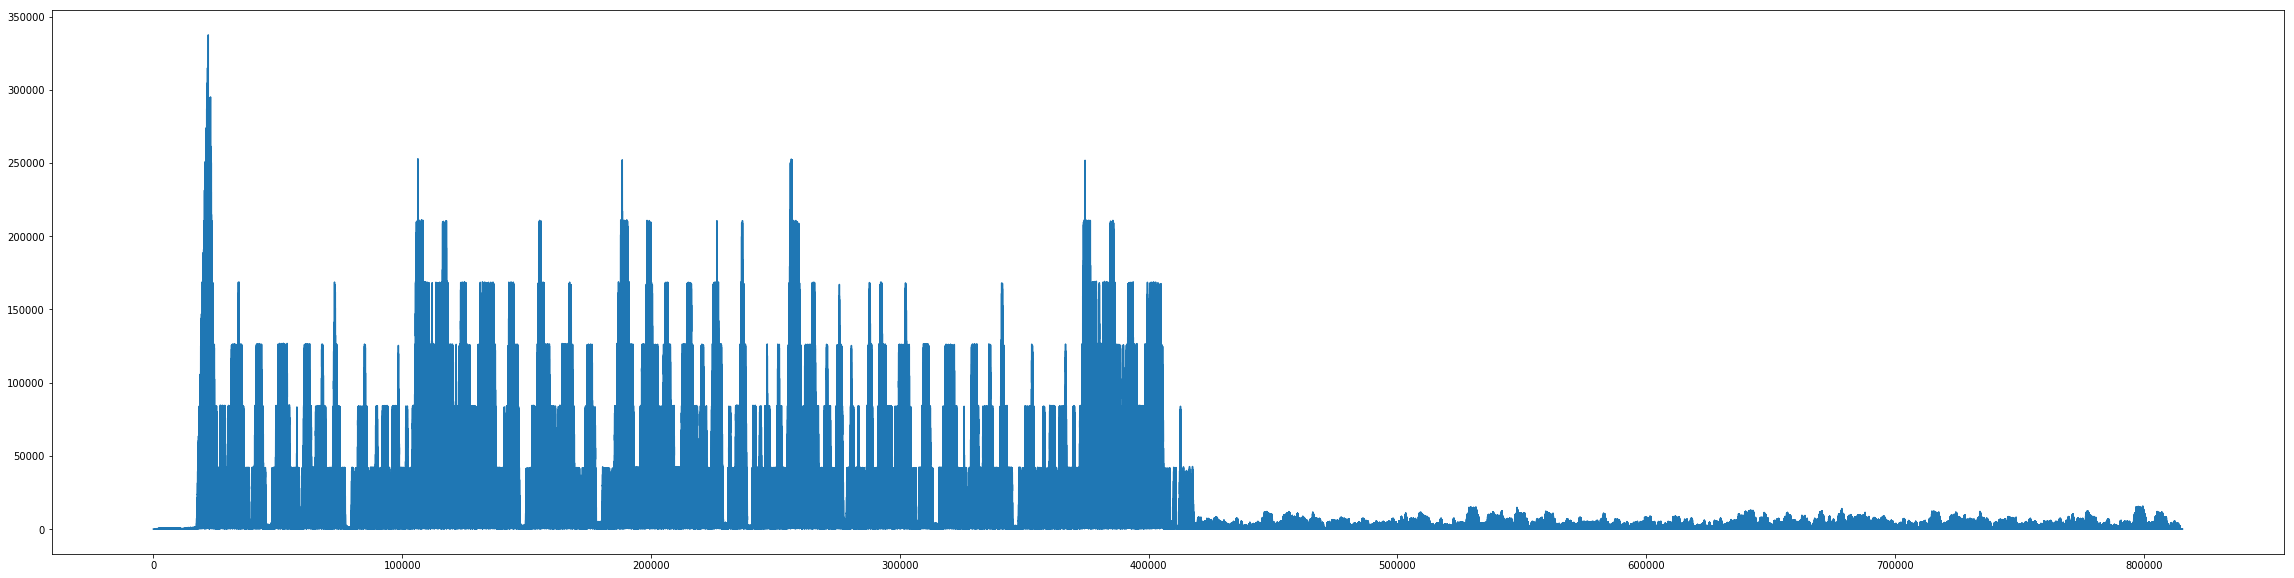

In [7]:
temp6 = compute_array("test1.txt")
plt.figure(figsize=(40,10))
plt.plot(temp6)

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

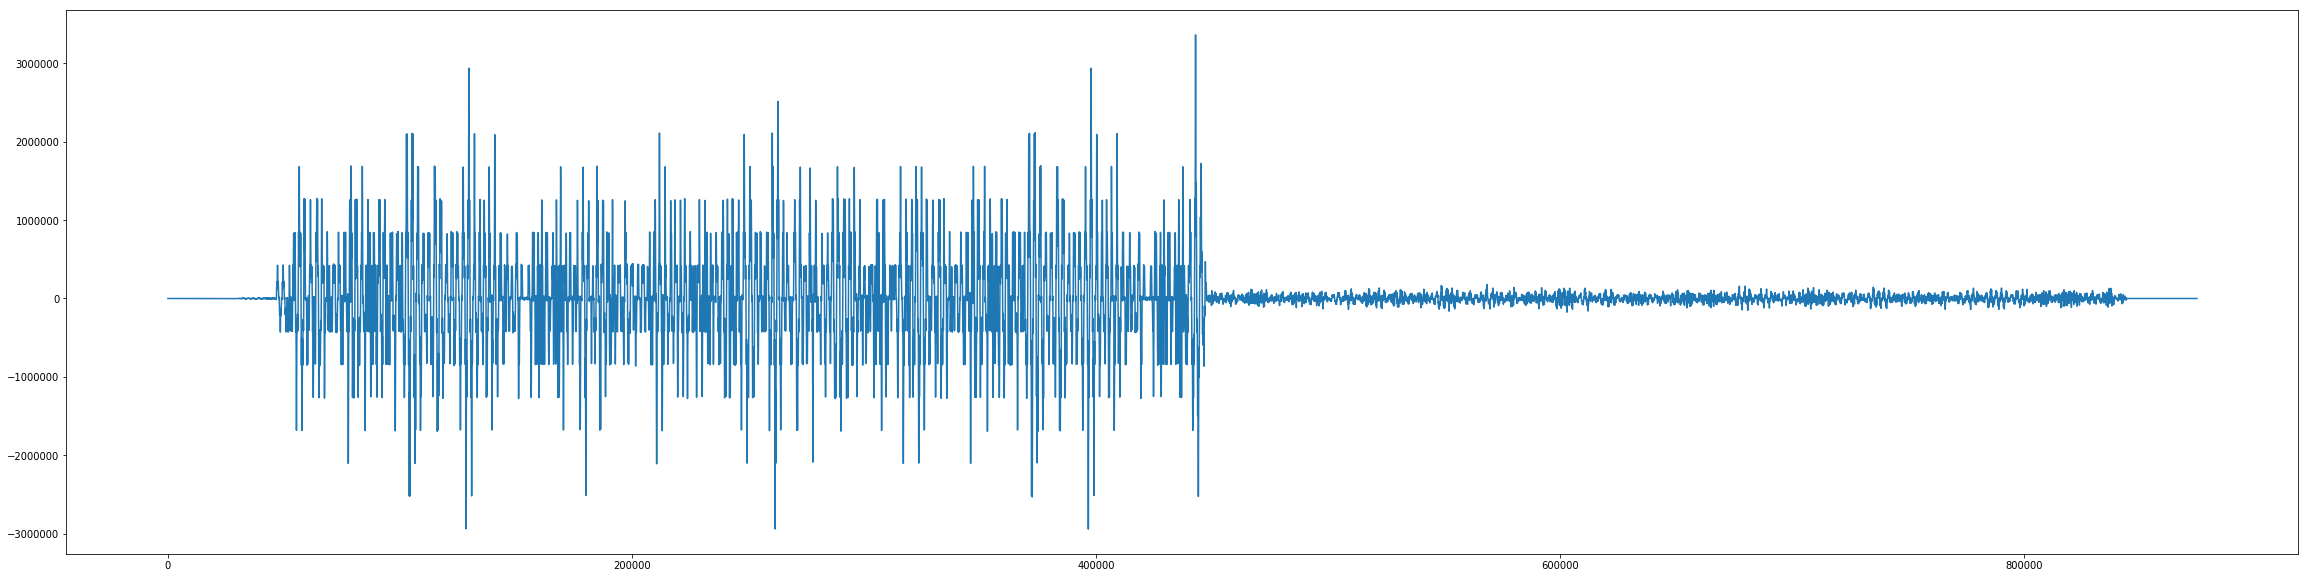

In [8]:
temp6 = compute_array("test.txt")
plt.figure(figsize=(40,10))
plt.plot(temp6)
plt.show

In [9]:

bit_string = "01011110"
decimal = int(bit_string, 2)
print(str(chr(decimal)))


^
